In [2]:
import random

from qutip import *
from qiskit.visualization import array_to_latex
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import chisquare

# 1)

## 1.A)

<ErrorbarContainer object of 3 artists>

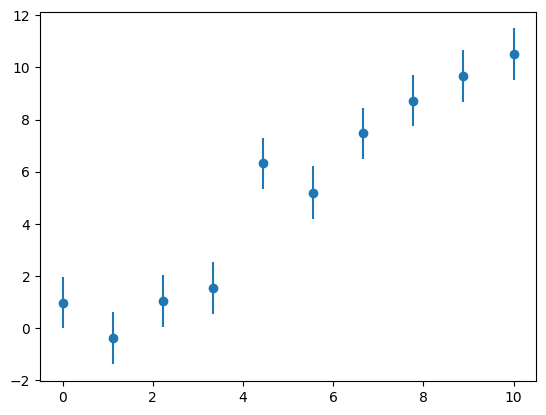

In [61]:
slope = 1
offset = 0.25
time = np.linspace(0,10,10)
data = np.random.normal(slope*time + offset,1)
sigma = 1*np.random.normal(np.ones(len(data)),0.01)

plt.errorbar(time,data,yerr=sigma,fmt='o')

## 1.B)

First, lets take a look at the linear fit

In [62]:
def func_linear(x, a, b):
    return a*x + b

In [63]:
lin_fit = curve_fit(func_linear, time, data, sigma=sigma)
print("Linear fit parameters: a={:0.4f}, b={:0.4f}".format(lin_fit[0][0], lin_fit[0][1]))

Linear fit parameters: a=1.1479, b=-0.6148


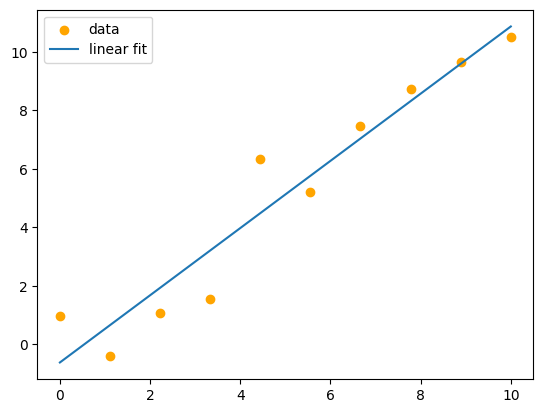

In [64]:
plt.scatter(time, data, label='data', color='orange')
plt.plot(time, func_linear(time, *lin_fit[0]), label='linear fit')
plt.legend()
plt.show()

Next, lets take a look at the quadtatic fit.

In [65]:
def func_quadratic(x, a, b, c):
    return a * x**2 + b * x + c

In [66]:
quad_fit = curve_fit(func_quadratic, time, data, sigma=sigma)
print("Quadratic fit parameters: a={:0.4f}, b={:0.4f}, c={:0.4f}".format(quad_fit[0][0], quad_fit[0][1], quad_fit[0][2]))

Quadratic fit parameters: a=0.0135, b=1.0132, c=-0.4167


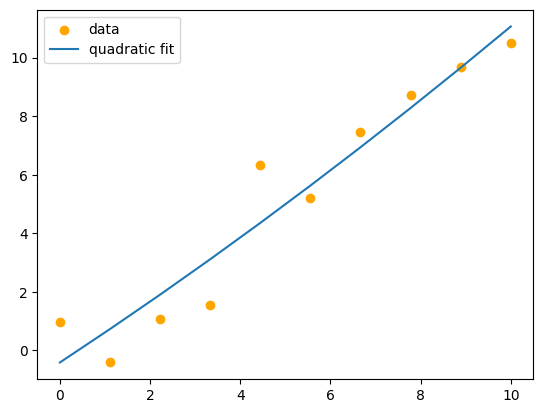

In [67]:
plt.scatter(time, data, label='data', color='orange')
plt.plot(time, func_quadratic(time, *quad_fit[0]), label='quadratic fit')
plt.legend()
plt.show()

# 1.C)

In [68]:
def chi_squared(data, model, sigma):
    sum = 0
    for i in range(len(data)):
        sum += ((data[i] - model[i])/sigma[i])**2
    return sum

In [69]:
chi_square_linear = chi_squared(data, func_linear(time, *lin_fit[0]), sigma)
v_linear = len(data) - len(lin_fit[0])
print(v_linear)
print("X^2 / V for linear fit: {:0.4f}".format(chi_square_linear/v_linear))

8
X^2 / V for linear fit: 1.4412


In [70]:
chi_square_quadratic = chi_squared(data, func_quadratic(time, *quad_fit[0]), sigma)
v_quadratic = len(data) - len(quad_fit[0])
print(v_quadratic)
print("X^2 / V for quadratic fit: {:0.4f}".format(chi_square_quadratic/v_quadratic))

7
X^2 / V for quadratic fit: 1.6257


Therefore, we can conclude that the linear fit is slightly better for fitting this data than the quadratic

# 3)

## 3.A)

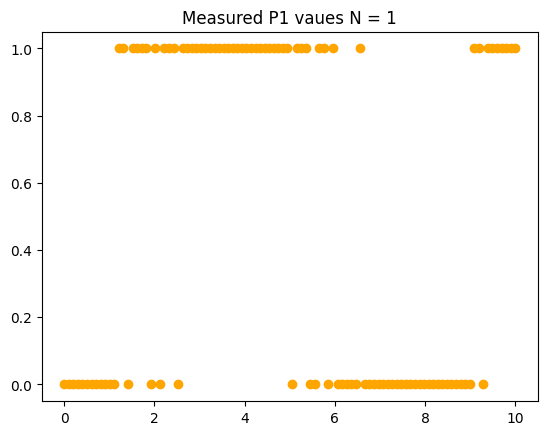

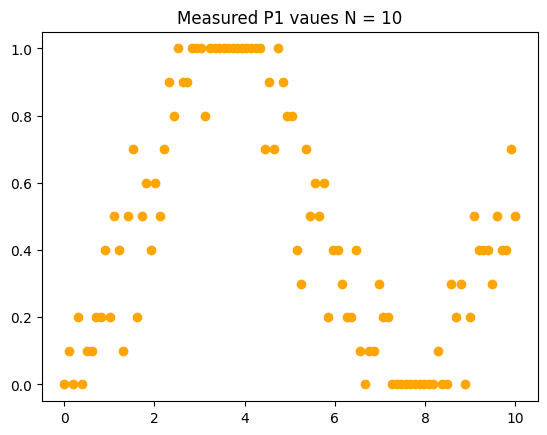

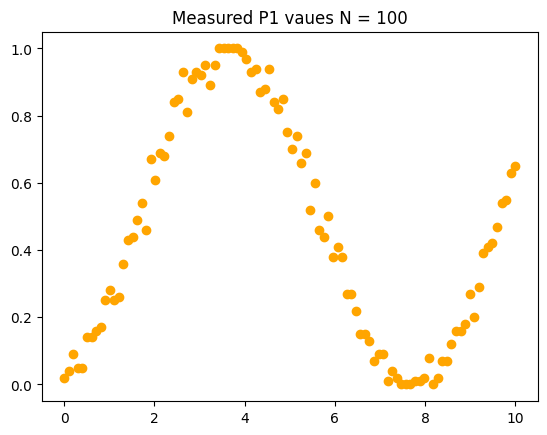

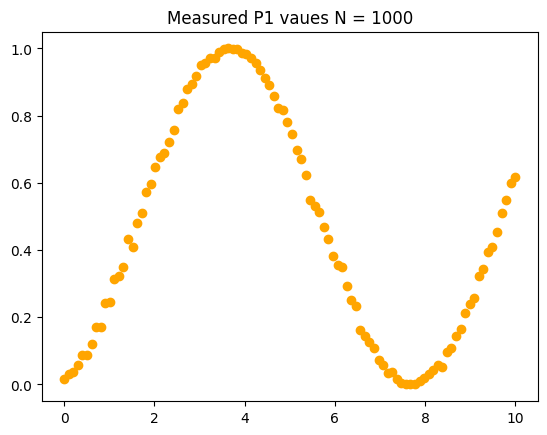

In [2]:
t_p = 1
delta = np.pi / 4
Omega = 2 * np.pi

def P1(t_w, Omega, delta):
    Omega_p = np.sqrt(Omega**2 + delta**2)
    return 1 - (Omega**2) / (Omega_p**4) * (Omega_p * np.cos(delta * t_w / 2) * np.sin(np.pi/2) - 2 * delta * np.sin(delta * t_w / 2) * np.sin(np.pi/4)**2 )**2


for N in [1, 10, 100, 1000]:
    t_w = np.linspace(0, 10, 100)
    measured_results = []
    for t in t_w:
        true_p1 = P1(t, Omega, delta)
        p1_vals = np.sum(np.random.binomial(1, true_p1, N)) / N
        measured_results.append(p1_vals)

    plt.scatter(t_w, measured_results, label='data', color='orange')
    plt.title("Measured P1 vaues N = {}".format(N))
    plt.show()


## 3.B)

Best t for N = 1 is 1.4954954954954955


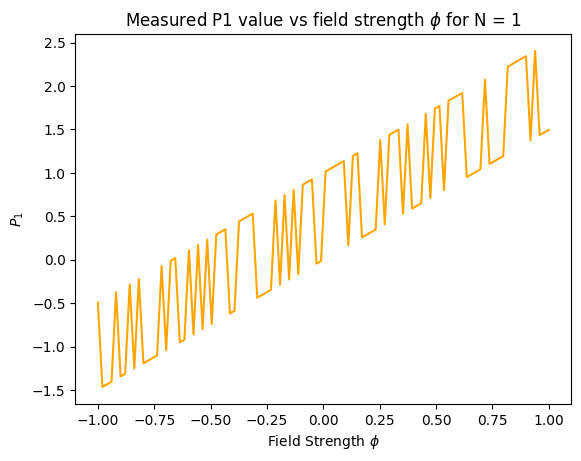

Best t for N = 10 is 1.0


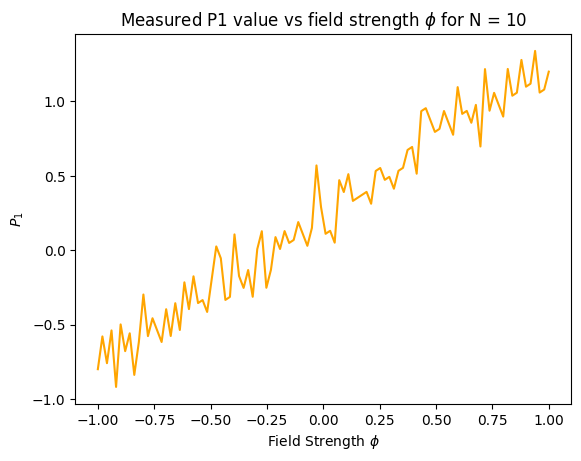

Best t for N = 100 is 1.6936936936936937


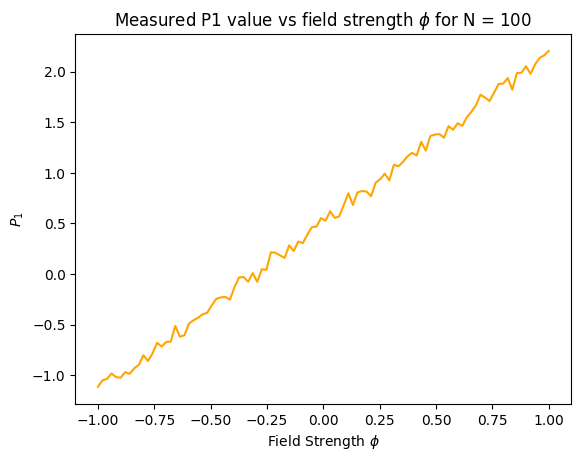

Best t for N = 1000 is 1.6936936936936937


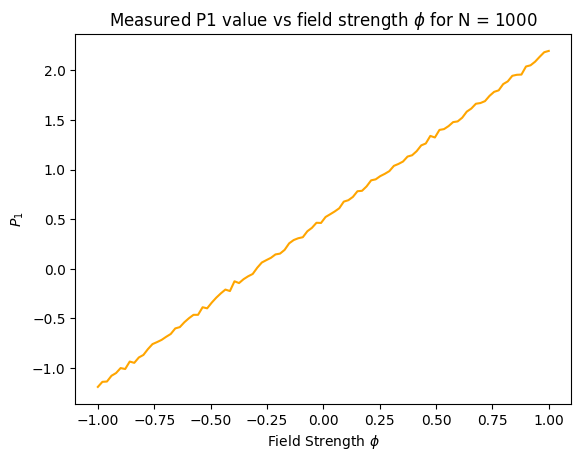

In [7]:
for N in [1, 10, 100, 1000]:
    t_w = np.linspace(1, 100, 1000)
    
    # First, find the best t by sampling around 2
    best_t = 0
    for t in t_w:
        true_p1 = P1(t, Omega, delta)
        p1_val = np.sum(np.random.binomial(1, true_p1, N)) / N
        if p1_val >= 0.5:
            best_t = t
            break
    print("Best t for N = {} is {}".format(N, best_t))

    # Now, lets plot our results relative to the strengh of the field phi
    gamma = 1
    phis = np.linspace(-1, 1, 100)
    measured_p1 = []
    for phi in phis:
        dp1 = gamma * phi * best_t
        p1_val = np.sum(np.random.binomial(1, true_p1, N)) / N
        measured_p1.append(p1_val + dp1)


    plt.plot(phis, measured_p1, label='data', color='orange')
    plt.title("Measured P1 value vs field strength $\phi$ for N = {}".format(N))
    plt.xlabel("Field Strength $\phi$")
    plt.ylabel("$P_1$")
    plt.show()

As we can see, we get a linear relationship between our field strength and our shifted slope probability at $ P_1 \approx 1/2 $

## 3.C)

# 4)

## 4.A)

In [27]:
def U(n, t, omega):
    return (-1.j * omega * t * (create(n) * destroy(n) + 0.5 * identity(n)) ).expm()

In [30]:
n = 5
m = 1
alpha = 1
omega = 2 * np.pi

t_vals = np.linspace(0, 10, 100)
evolved_states = []
probs = []
for t in t_vals:
    state = U(n, t, omega) * coherent(n, alpha)
    state_p1_prob = np.abs((fock(n,0).dag() * state * fock(n,0))[0,0])**2

    evolved_states.append(state)
    probs.append(state_p1_prob)

print("Eveolved states:")
print(evolved_states)

Eveolved states:
[Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.60655682]
 [0.60628133]
 [0.4303874 ]
 [0.24104351]
 [0.14552147]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.57627211-0.18926601j]
 [ 0.35167767-0.49386219j]
 [-0.00682851-0.43033322j]
 [-0.14597828-0.19181322j]
 [-0.13962682-0.04099813j]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.48844216-0.35963235j]
 [-0.1982952 -0.57293635j]
 [-0.43017072+0.0136553j ]
 [-0.06423178+0.23232789j]
 [ 0.12242045+0.07867484j]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.35183747-0.4940866j ]
 [-0.58172267-0.17080919j]
 [ 0.02047866+0.42989992j]
 [ 0.22377706-0.08958682j]
 [-0.09529629-0.10997779j]], Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[ 0.18009908-0.57920246j]
 [-0.47656931+0.37477825j]
 [ 0.42952089-0.02729686j]
 [-0.20681133-0.1238186j ]
 [ 0.0604518 +0.13237

## 3.B)

In [15]:
def x(t, m, A, omega, phi):
    return np.sqrt(m * omega / 2) * A * np.cos(omega * t + phi)

def p(t, m, A, omega, phi):
    return -A **2 * omega * np.sin(omega * t + phi) / np.sqrt(2 * m * omega)

In [25]:
def get_std_dev(op):
    std_devs = []
    for t in t_vals:
        state = U(n, t, alpha, omega) * coherent(n, alpha)

        # Calculate the standard deviation of the operator
        std_dev = np.sqrt(expect(op*op, state) - expect(op, state)**2)
        std_devs.append(std_dev)

    return std_devs

[0.7145094900826262, 0.78781154217883, 0.8922812857885223, 0.8889729659090347, 0.7818277227311802, 0.7147301293924031, 0.7938682066425542, 0.895287308554754, 0.885372360744726, 0.7759428043825348, 0.7153907515490376, 0.7999719523389874, 0.8979820224897186, 0.8814904805143693, 0.7701830189043409, 0.7164874847382126, 0.806097412358215, 0.9003574170159774, 0.877339331206932, 0.7645746448525734, 0.7180139271736283, 0.8122197096576605, 0.9024064832155534, 0.8729319108162953, 0.7591438663693245, 0.7199612224310227, 0.8183145390850429, 0.9041232139880104, 0.86828220414713, 0.7539166199968066, 0.7223181619541901, 0.8243582391466897, 0.9055026039728694, 0.8634051758658585, 0.7489184301712796, 0.7250713119580778, 0.8303278543057997, 0.9065406493388019, 0.8583167614244541, 0.7441742344721248, 0.7282051614104895, 0.8362011886304588, 0.9072343475215467, 0.8530338554352678, 0.739708200146203, 0.7317022873894524, 0.8419568516196682, 0.9075816969738887, 0.8475742970223467, 0.7355435338956882, 0.735543